# Regressão linear, não-linear e Redes Neurais
#### Prof. Anderson Rocha Tavares (artavares@inf.ufrgs.br)

**Objetivo deste notebook**: verificar o funcionamento básico de regressão linear, suas limitações e como contorná-las via biblioteca scikit-learn, bem como ver o poder de redes neurais.


In [ ]:
# imports
import numpy as np          # para matrizes
import pandas as pd         # para manipulação de dados
from sklearn.model_selection import train_test_split  # para divisão dos dados
from sklearn.linear_model import LinearRegression  # para regressão linear
from sklearn.neural_network import MLPRegressor  # para rede neural
from sklearn.metrics import mean_squared_error, mean_absolute_error  # para métricas de avaliação de regressão
import matplotlib.pyplot as plt  # para plotagem dos gráficos
import unittest                  # pra realizacao dos testes automatizados
test = unittest.TestCase()  # o objeto test contem metodos pra fazer os testes

### Geração de dados

O conjunto de dados é gerado artificialmente, contendo apenas um atributo preditivo (x) e um atributo alvo (y). A relação entre x e y é quadrática, com ruído: `y = (3x^2 + 2x + 5) + ruído`.



In [ ]:
# Geração de dados fictícios.
np.random.seed(0)                                     # fixando a semente aleatoria: dados gerados serao sempre iguais
x = np.random.normal(loc=0, scale=1, size=200)        # 200 valores com media 0  e desvio padrao 1
noise = np.random.normal(loc=0, scale=0.4, size=200)  # ruído gaussiano (200 valores) com média 0 e desvio padrão 0.4
y = 3*(x ** 2) + 2*x + 1 + noise                    # função alvo -- cada ponto do ruido é somado a 3 * (x ** 2) + 2*x + 1

data = pd.DataFrame({'x': x, 'y': y})             # criação do dataframe (análogo à planilha) com os dados

# verifica se os dados estao conforme esperado (se vc mudar o codigo acima, os testes vao quebrar)
# assertAlmostEqual compara dois floats com uma margem de tolerância (default = 1e-7)
# e o teste reprova se a diferença fica fora dessa margem
test.assertAlmostEqual(data['x'][0], 1.764052345967664)
test.assertAlmostEqual(data['y'][0], 13.716074)

data    # mostra os dados

,x,y
0,1.764052,13.716074
1,0.400157,2.184940
2,0.978738,6.271124
3,2.240893,20.808699
4,1.867558,15.454487
...,...,...
195,-0.171546,0.440595
196,0.771791,4.673733
197,0.823504,5.137926
198,2.163236,19.951873


A celula anterior gera e mostra os dados como tabela. Só olhando os números, não dá pra ver a relação entre eles. Vamos plotar. E, antes disso, vamos dividir em dados de treino e teste (holdout).

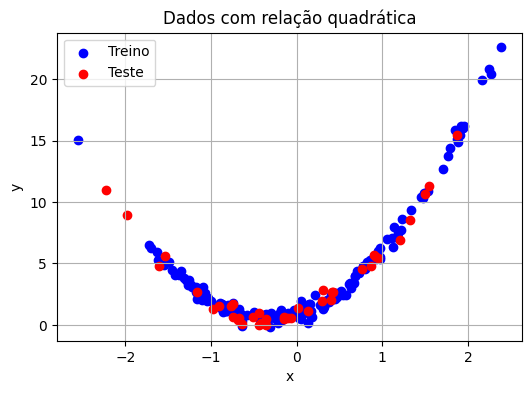

Formato de x_train antes do reshape: (160, 1)
Formato de x_test antes do reshape: (40, 1)
Formato de x_train  (linhas,colunas) depois do reshape: (160, 1)
Formato de x_test (linhas,colunas) depois do reshape: (40, 1)


In [ ]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(data[['x']], data['y'], test_size=0.2, random_state=0)

# exibição dos dados
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_test, y_test, color='red', label='Teste')
plt.title('Dados com relação quadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Tecnicalidade: o formato de x_train é (160,), ou seja, 160 valores sem organização em linhas ou colunas.
# Respectivamente, o shape de x_test é (40,), ou seja, 40 valores sem organização em linhas ou colunas.
# Precisamos explicitar que temos 160 linhas e 1 coluna em x_train e 40 linhas e uma coluna em x_test. O reshape abaixo faz isso.

print(f'Formato de x_train antes do reshape: {x_train.shape}')
print(f'Formato de x_test antes do reshape: {x_test.shape}')
x_train_reshape = x_train.values.reshape(-1, 1)
x_test_reshape = x_test.values.reshape(-1, 1)
print(f'Formato de x_train  (linhas,colunas) depois do reshape: {x_train.shape}')
print(f'Formato de x_test (linhas,colunas) depois do reshape: {x_test.shape}')

# apos reshape, o shape de x_train e x_test deixa explicito o numero de linhas e colunas
# respectivamente, x_train fica com 160 linhas e 1 coluna; x_test fica com 40 linhas e 1 coluna

### Regressão linear simples

O código a seguir cria um objeto de regressão linear e obtém um modelo treinado a partir dos dados. O código também obtém os coeficientes (inclinação e intercepto) da reta, e os mostra.

Note que a reta não se ajusta bem aos pontos (underfitting). Observe o MAE e o MSE (quanto menor, melhor).

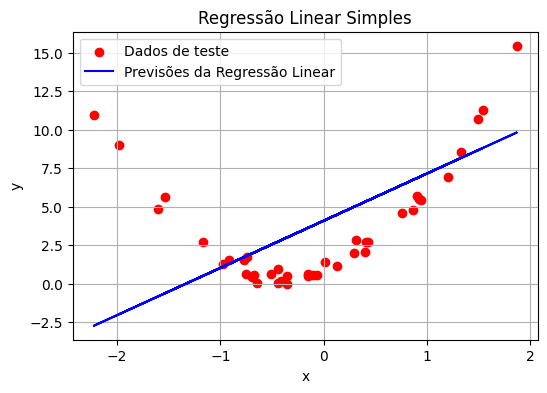

Regressão Linear Simples
MSE: 14.622593019734666, MAE: 2.8037409693469857
Equação encontrada: 3.0690*x + 4.0808


In [ ]:
# Regressão linear simples
model_linear_simple = LinearRegression()
model_linear_simple.fit(x_train_reshape, y_train)   # ajuste nos dados de treino
y_pred_test_linear_simple = model_linear_simple.predict(x_test_reshape) # obtendo previsoes para os dados de teste

# Métricas
mse_test_linear_simple = mean_squared_error(y_test, y_pred_test_linear_simple)
mae_test_linear_simple = mean_absolute_error(y_test, y_pred_test_linear_simple)

# Coeficientes (a equacao encontrada é w1*x + b)
w1 = model_linear_simple.coef_[0]   # inclinacao
b = model_linear_simple.intercept_  # intercepto

# Plotagem
plt.figure(figsize=(6, 4))
plt.scatter(x_test_reshape, y_test, color='red', label='Dados de teste')
plt.plot(x_test, y_pred_test_linear_simple, color='blue', label='Previsões da Regressão Linear')    # o shape nao faz diferenca pra plotar
plt.title('Regressão Linear Simples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Exibição dos resultados e coeficientes
print(f"Regressão Linear Simples")
print(f"MSE: {mse_test_linear_simple}, MAE: {mae_test_linear_simple}")
print(f"Equação encontrada: {w1:.4f}*x + {b:.4f}")    # precisao de 4 decimais


### Adicionando um 'atributo extra'

Nem tudo está perdido para a regressão linear. Como sabemos que a relação entre entrada e saída é quadrática, adicionamos um atributo preditivo extra que reflita isso. Ou seja, uma nova coluna no conjunto de dados, cujos valores são o quadrado do atributo preditivo original. O coeficiente encontrado para esse novo atributo na regressão é justamente o multiplicador de x^2 em uma equação de parábola.

In [ ]:
# quando as operações sao feitas em um vetor numpy, todos os elementos do vetor sofrem a operação
x_train['x_squared'] = x_train['x'] ** 2
x_test['x_squared'] = x_test['x'] ** 2

### Regressão linear com 'atributo extra'

Regressão Linear com Dados Aumentados
MSE: 0.1825229447910967, MAE: 0.3525053387554281
Equação encontrada: 3.0182172193036894*x^2 + 2.0065175183013526*x + 0.9436339304045793


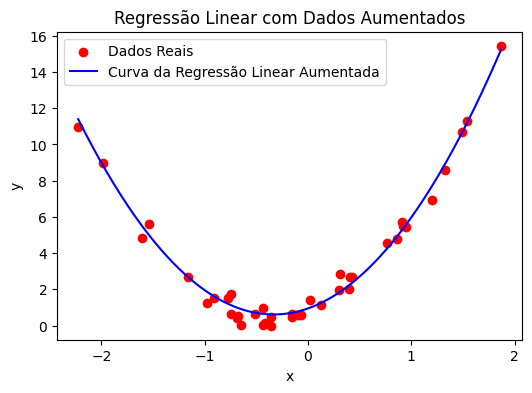

In [ ]:
# Regressão linear com dados aumentados
model_linear_augmented = LinearRegression()  # crie uma instancia de LinearRegression()
model_linear_augmented.fit(x_train, y_train)    # faca o treinamento
y_pred_test_linear_augmented = model_linear_augmented.predict(x_test) # obtenha as predicoes para os dados de teste

# Métricas
mse_test_linear_augmented = mean_squared_error(y_test, y_pred_test_linear_augmented)  # calcule MSE e o MAE
mae_test_linear_augmented = mean_absolute_error(y_test, y_pred_test_linear_augmented)

# o codigo abaixo é pra plotagem

# Coeficientes
coefficients = model_linear_augmented.coef_  # coeficientes para 'x' e 'x_squared'
intercept = model_linear_augmented.intercept_  # intercepto

# Preparando dados para plotar a curva encontrada, ao inves de simplesmente das predicoes para os pontos em x_test
x_range = np.linspace(x_test['x'].min(), x_test['x'].max(), 300)      # obtem 300 pontos igualmente espaçados entre o minimo e o maximo
x_range_df = pd.DataFrame({'x': x_range, 'x_squared': x_range**2})    # cria um mini dataframe com os novos valores de x para predicao
y_range_pred = model_linear_augmented.predict(x_range_df)              # predicao para os novos valores de x

# Plotagem
plt.figure(figsize=(6,4))
plt.scatter(x_test['x'], y_test, color='red', label='Dados Reais')
plt.plot(x_range, y_range_pred, color='blue', label='Curva da Regressão Linear Aumentada')
plt.title('Regressão Linear com Dados Aumentados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Exibição dos resultados e coeficientes
print(f"Regressão Linear com Dados Aumentados")
print(f"MSE: {mse_test_linear_augmented}, MAE: {mae_test_linear_augmented}")
print(f"Equação encontrada: {coefficients[1]}*x^2 + {coefficients[0]}*x + {intercept}")

A função aprendida do ponto de vista da regressão linear aumentada é um plano, já que tem dois atributos preditivos de entrada. O gráfico é interativo, então fique à vontade para dar zoom e mudar o ângulo de visão.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Preparando os dados para o gráfico 3D
x_surface = np.linspace(x_test['x'].min(), x_test['x'].max(), 50)
x_surface_squared = x_surface ** 2
X1, X2 = np.meshgrid(x_surface, x_surface_squared)
X_flat = np.column_stack((X1.ravel(), X2.ravel()))
y_pred_surface = model_linear_augmented.predict(np.column_stack((X1.ravel(), X2.ravel()))).reshape(X1.shape)

# Criando o gráfico 3D
# Plotagem interativa 3D
fig = go.Figure(data=[go.Surface(z=y_pred_surface, x=X1, y=X2, colorscale='Viridis', opacity=0.6),
                      go.Scatter3d(x=x_test['x'], y=x_test['x_squared'], z=y_test,
                                   mode='markers', marker=dict(size=5, color='red'))])

fig.update_layout(title='Regressão Linear no Espaço 3D (2 Entradas, 1 Saída)',
                  scene=dict(
                      xaxis_title='x',
                      yaxis_title='x^2',
                      zaxis_title='y'),
                  autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Regressão com redes neurais

Podemos adicionar atributos extras para tornar linear um problema originalmente não-linear. Porém, pode ser difícil determinar como combinar ou estender os atributos existentes para fazer isso. Redes Neurais vem ao socorro, pois cada unidade (neurônio artificial) aprede alguma relação ou aspecto "oculto" nos dados.

O código abaixo mostra a criação de uma rede neural para os dados que estamos trabalhando.

A classe é MLPRegressor pelo seguinte: MLP é Multi-Layer Perceptron, uma rede neural de múltiplas camadas (isso torna possível o aprendizado de coisas "ocultas" nos dados). Regressor é porque estamos usando a rede neural para regressão.

Os hiperparâmetros da rede neural são:
- hidden_layer_sizes: uma sequência de números indicando quantos neurônios há em cada camada oculta da rede. Quanto maior, mais poder preditivo, porém maior o tempo de treinamento e risco de overfitting.
- max_iter: número de épocas, ou seja, passadas pelo conjunto de dados (redes neurais precisam passar várias vezes pelos dados, pois a cada vez, fazem pequenos ajustes). Quanto maior, mais chance da rede se ajustar bem aos dados, porém maior o tempo de treinamento
- random_state: não é um hiperparâmetro da rede neural em si, mas apenas configura o gerador de numeros aleatórios para que não haja variações em diferentes execuções do mesmo código.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPRegressor was fitted without feature names



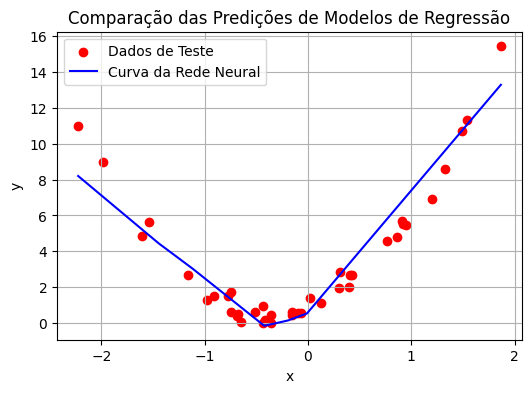

Regressão com Rede Neural
MSE: 1.0169523825790419, MAE: 0.7835367401535789


In [ ]:
# Rede neural para regressão
nn_model_regressor = MLPRegressor(hidden_layer_sizes=(5,5), max_iter=1000, random_state=0)   # fixando random_state para garantir execuções iguais
nn_model_regressor.fit(x_train_reshape, y_train)    # nao estamos usando o dataset com 'coluna extra'
y_pred_nn_regressor = nn_model_regressor.predict(x_test_reshape)

# Métricas
mse_nn_regressor = mean_squared_error(y_test, y_pred_nn_regressor)
mae_nn_regressor = mean_absolute_error(y_test, y_pred_nn_regressor)

# Preparando dados para plotar a curva encontrada, ao inves de simplesmente das predicoes para os pontos em x_test
x_range = np.linspace(x_test['x'].min(), x_test['x'].max(), 400)      # obtem 300 pontos igualmente espacados entre o minimo e o maximo
x_range_df = pd.DataFrame({'x': x_range})    # cria um mini dataframe com os novos valores de x para predicao
y_range_pred = nn_model_regressor.predict(x_range_df)              # predicao para os novos valores de x

# Plotagem
plt.figure(figsize=(6,4))
plt.scatter(x_test['x'], y_test, color='red', label='Dados de Teste')
plt.plot(x_range_df, y_range_pred, color='blue', label='Curva da Rede Neural')
plt.title('Comparação das Predições de Modelos de Regressão')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Exibição das métricas
# Exibição dos resultados e coeficientes
print(f"Regressão com Rede Neural")
print(f"MSE: {mse_nn_regressor}, MAE: {mae_nn_regressor}")


### Epílogo

Fique à vontade para testar modificações na rede neural para melhorar o desempenho (e.g. mais épocas de treino, mais neurônios, etc). Coisas não intuitivas podem acontecer (e.g. mais camadas fazem a rede ficar pior), mas é porque quanto mais parâmetros pra ajustar (mais neuronios e/ou camadas), mais passadas nos dados (épocas) são necessárias para se obter um bom ajuste.